In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('CyberAttack.csv')

In [3]:
df.head() #no columns in our dataset so we need to create ones for ourselves and read back the data. 

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.2,0.22,0.11.1,0.23,0.24,0.25,0.26,0.27,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
columns = ["Duration", "Protocoltype", "Service", "Flag", "Srcbytes", "Dstbytes", "Land", "Wrongfragment",
           "Urgent", "Hot", "Numfailedlogins", "Loggedin", "Numcompromised", "Rootshell", "Suattempted",
           "Numroot", "Numfilecreations", "Numshells", "Numaccessfiles", "Numoutboundcmds", "Ishostlogin",
           "Isguestlogin", "Count", "Srvcount", "serrorrate", "Srvserrorrate", "Rerrorrate", "Srvrerrorrate",
           "Samesrvrate", "Diffsrvrate", "Srvdiffhostrate", "Dsthostcount", "Dsthostsrvcount",
           "Dsthostsamesrvrate", "Dsthostdiffsrvrate", "Dsthostsamesrcportrate", "Dsthostsrvdiffhostrate",
           "Dsthostserrorrate", "Dsthostsrvserrorrate", "Dsthostrerrorrate", "Dsthostsrvrerror_rate","Labels"]
df=pd.read_csv('CyberAttack.csv',names=columns)

In [5]:
df.head()

,Duration,Protocoltype,Service,Flag,Srcbytes,Dstbytes,Land,Wrongfragment,Urgent,Hot,...,Dsthostsrvcount,Dsthostsamesrvrate,Dsthostdiffsrvrate,Dsthostsamesrcportrate,Dsthostsrvdiffhostrate,Dsthostserrorrate,Dsthostsrvserrorrate,Dsthostrerrorrate,Dsthostsrvrerror_rate,Labels
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [6]:
df.tail()

,Duration,Protocoltype,Service,Flag,Srcbytes,Dstbytes,Land,Wrongfragment,Urgent,Hot,...,Dsthostsrvcount,Dsthostsamesrvrate,Dsthostdiffsrvrate,Dsthostsamesrcportrate,Dsthostsrvdiffhostrate,Dsthostserrorrate,Dsthostsrvserrorrate,Dsthostrerrorrate,Dsthostsrvrerror_rate,Labels
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.
494020,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.


In [7]:
df.shape

(494021, 42)

In [8]:
df.dtypes

Duration                    int64
Protocoltype               object
Service                    object
Flag                       object
Srcbytes                    int64
Dstbytes                    int64
Land                        int64
Wrongfragment               int64
Urgent                      int64
Hot                         int64
Numfailedlogins             int64
Loggedin                    int64
Numcompromised              int64
Rootshell                   int64
Suattempted                 int64
Numroot                     int64
Numfilecreations            int64
Numshells                   int64
Numaccessfiles              int64
Numoutboundcmds             int64
Ishostlogin                 int64
Isguestlogin                int64
Count                       int64
Srvcount                    int64
serrorrate                float64
Srvserrorrate             float64
Rerrorrate                float64
Srvrerrorrate             float64
Samesrvrate               float64
Diffsrvrate   

In [9]:
[col for col in df.columns if df[col].isnull().sum() > 0] # No Null values

[]

In [10]:
df.isnull().sum()

Duration                  0
Protocoltype              0
Service                   0
Flag                      0
Srcbytes                  0
Dstbytes                  0
Land                      0
Wrongfragment             0
Urgent                    0
Hot                       0
Numfailedlogins           0
Loggedin                  0
Numcompromised            0
Rootshell                 0
Suattempted               0
Numroot                   0
Numfilecreations          0
Numshells                 0
Numaccessfiles            0
Numoutboundcmds           0
Ishostlogin               0
Isguestlogin              0
Count                     0
Srvcount                  0
serrorrate                0
Srvserrorrate             0
Rerrorrate                0
Srvrerrorrate             0
Samesrvrate               0
Diffsrvrate               0
Srvdiffhostrate           0
Dsthostcount              0
Dsthostsrvcount           0
Dsthostsamesrvrate        0
Dsthostdiffsrvrate        0
Dsthostsamesrcportra

In [11]:
df.drop(['Service','Flag','Land','Wrongfragment','Urgent','Hot','Loggedin','Numcompromised','Rootshell','Isguestlogin'
,'Srvcount','serrorrate','Srvserrorrate'],axis=1,inplace=True)    

In [12]:
df.drop(['Samesrvrate','Diffsrvrate','Srvdiffhostrate','Dsthostcount','Dsthostsrvcount','Dsthostsamesrvrate','Dsthostdiffsrvrate',     
         'Dsthostsamesrcportrate','Dsthostsrvdiffhostrate','Dsthostserrorrate','Dsthostsrvserrorrate','Dsthostrerrorrate','Dsthostsrvrerror_rate'],axis=1,inplace=True)

In [13]:
grouped_labels = df.groupby("Labels")["Labels"].count().sort_values(ascending=False)
grouped_labels

Labels
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: Labels, dtype: int64

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:xlabel='Labels'>

Text(0.5, 1.0, 'Count of attacks and normal events')

Text(0, 0.5, 'Count')

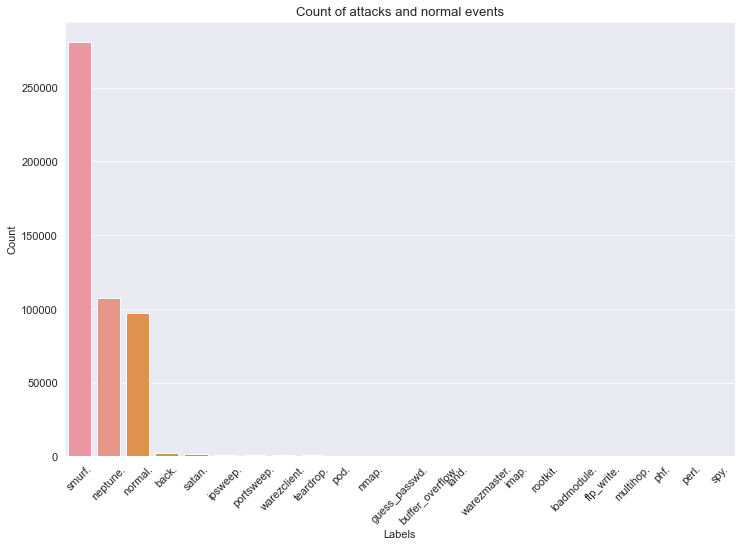

In [14]:
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (12,8)
font = {"size"   : 11}
plt.rc('font', **font)

plt.xticks(rotation=45)

sns.barplot(x=grouped_labels.index, y=grouped_labels.values)
plt.title("Count of attacks and normal events")
plt.ylabel("Count")

In [15]:
grouped_labels1 = df.groupby("Protocoltype")["Protocoltype"].count().sort_values(ascending=False)
grouped_labels1

Protocoltype
icmp    283602
tcp     190065
udp      20354
Name: Protocoltype, dtype: int64

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:xlabel='Protocoltype'>

Text(0.5, 1.0, 'labels by Protocol type')

Text(0, 0.5, 'Count')

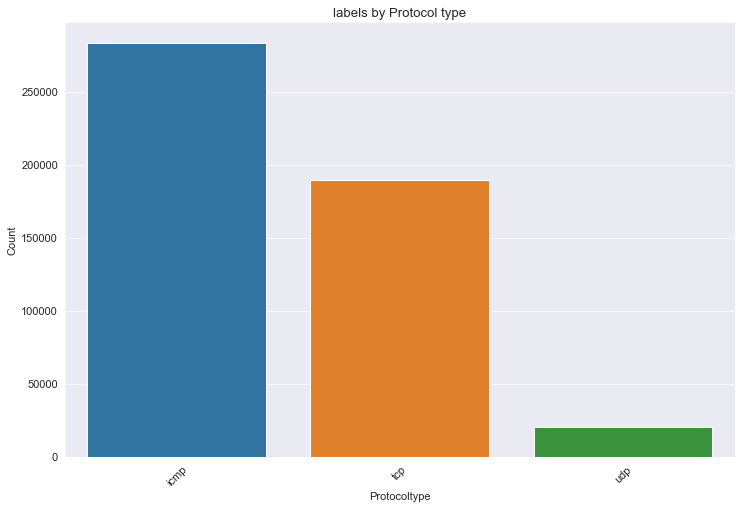

In [16]:
plt.xticks(rotation=45)
sns.barplot(x=grouped_labels1.index, y=grouped_labels1.values)
plt.title("labels by Protocol type")
plt.ylabel("Count")

There seems to a high number of maliscious events within the tcp and icmp protocols having a high number of past connections to the current host within the last 2 seconds. That's a column that already exists within the dataset.

In [17]:
df['Labels'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [18]:
def remove_dot(Label):
    """ Remove dot from labels """
    return Label.replace(".", "")


df["Labels"] = df["Labels"].apply(lambda Label: remove_dot(Label))
print(pd.unique(df["Labels"]))

['normal' 'buffer_overflow' 'loadmodule' 'perl' 'neptune' 'smurf'
 'guess_passwd' 'pod' 'teardrop' 'portsweep' 'ipsweep' 'land' 'ftp_write'
 'back' 'imap' 'satan' 'phf' 'nmap' 'multihop' 'warezmaster' 'warezclient'
 'spy' 'rootkit']


In [19]:
attack_families = {
    "back": "dos",
    "buffer_overflow": "u2r",
    "ftp_write": "r2l",
    "guess_passwd": "r2l",
    "imap": "r2l",
    "ipsweep": "probe",
    "land": "dos",
    "loadmodule": "u2r",
    "multihop": "r2l",
    "neptune": "dos",
    "nmap": "probe",
    "perl": "u2r",
    "phf": "r2l",
    "pod": "dos",
    "portsweep": "probe",
    "rootkit": "u2r",
    "satan": "probe",
    "smurf": "dos",
     "spy": "r2l",
    "teardrop": "dos",
    "warezclient": "r2l",
    "warezmaster": "r2l",
    "normal": "normal",
}    

In [20]:
def map_attacks_to_families(attack):
    """ Map attack to it's family """
    return attack_families[attack]


df["Labels"] = df["Labels"].apply(lambda attack: map_attacks_to_families(attack))
print(pd.unique(df["Labels"]))

['normal' 'u2r' 'dos' 'r2l' 'probe']


In [21]:
df.drop(df.index[50000:494021],axis=0,inplace=True)

Text(0.5, 1.0, 'Number of connections to the same host as the current connection in the past two seconds ')

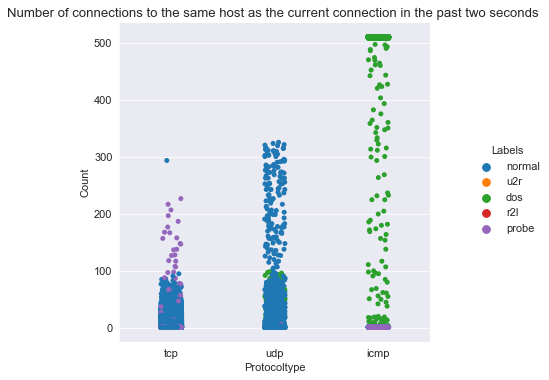

In [22]:
sns.catplot(x="Protocoltype", y="Count", hue="Labels", data=df)
plt.title("Number of connections to the same host as the current connection in the past two seconds ")

Text(0.5, 1.0, 'Correlation Factors Heat Map')

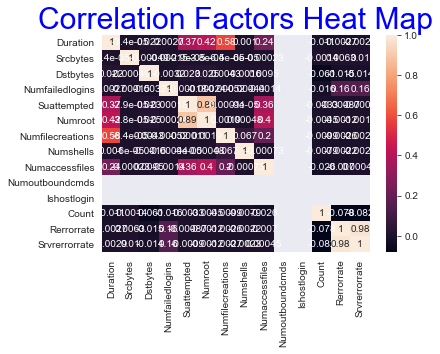

In [70]:
sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors Heat Map', color='blue', size='30')

<AxesSubplot:xlabel='Labels', ylabel='count'>

Text(0.5, 1.0, 'Class balance')

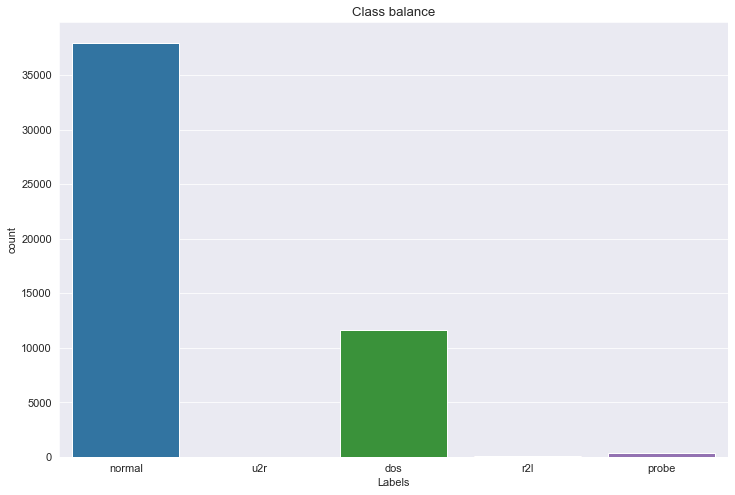

In [24]:
sns.countplot(x="Labels", data=df)
plt.title("Class balance")

Text(0.5, 1.0, 'Number of connections to the same host as the current connection in the past two seconds ')

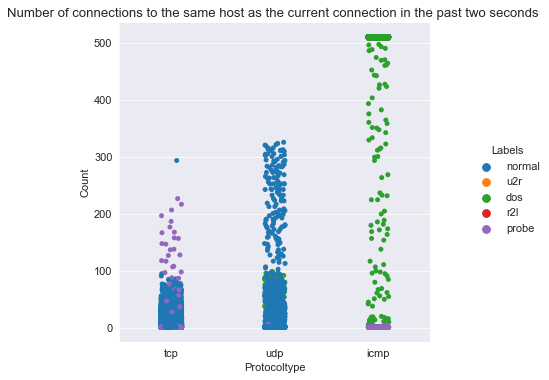

In [25]:
sns.catplot(x="Protocoltype", y="Count", hue="Labels", data=df)
plt.title("Number of connections to the same host as the current connection in the past two seconds ")

There seems to a high number of maliscious events within the tcp and icmp protocols having a high number of past connections to the current host within the last 2 seconds. That's a column that already exists within the dataset.

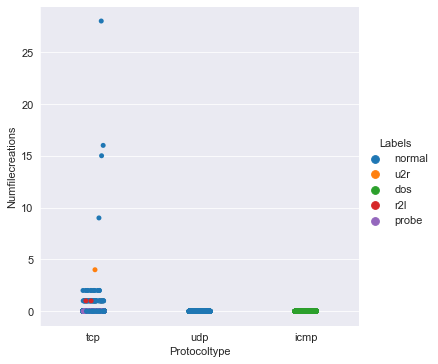

In [26]:
sns.catplot(x="Protocoltype", y="Numfilecreations", hue="Labels", data=df)

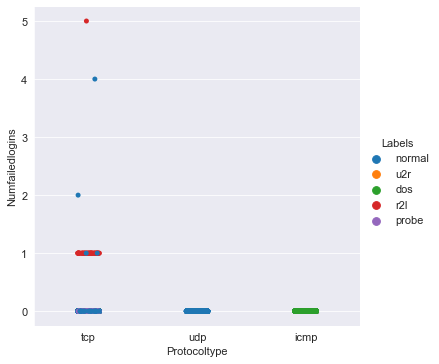

In [27]:
sns.catplot(x="Protocoltype", y="Numfailedlogins", hue="Labels", data=df)

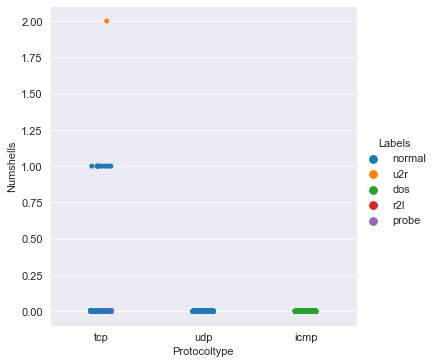

In [28]:
sns.catplot(x="Protocoltype", y="Numshells", hue="Labels", data=df)

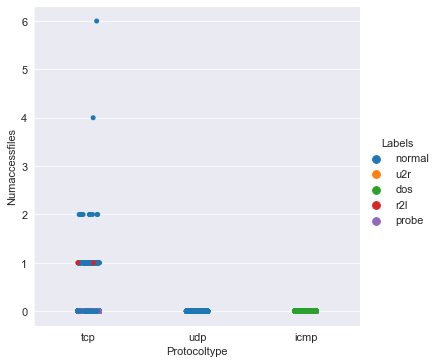

In [29]:
sns.catplot(x="Protocoltype", y="Numaccessfiles", hue="Labels", data=df)

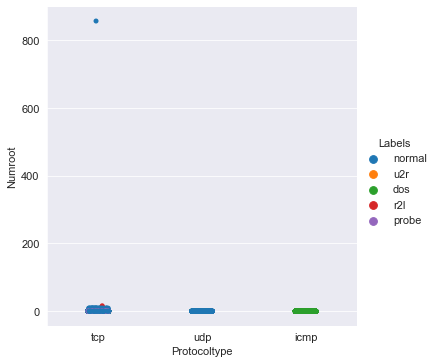

In [30]:
sns.catplot(x="Protocoltype", y="Numroot", hue="Labels", data=df)

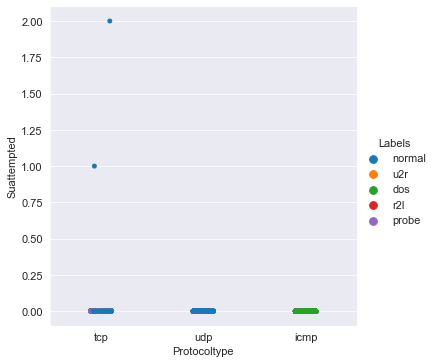

In [31]:
sns.catplot(x="Protocoltype", y="Suattempted", hue="Labels", data=df)

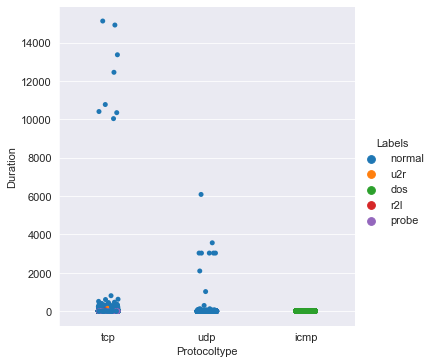

In [32]:
sns.catplot(x="Protocoltype", y="Duration", hue="Labels", data=df)

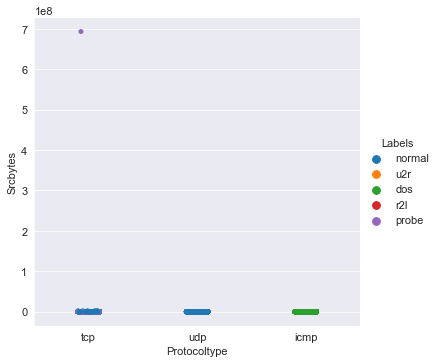

In [33]:
sns.catplot(x="Protocoltype", y="Srcbytes", hue="Labels", data=df)

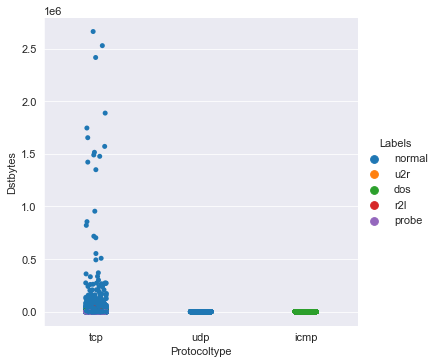

In [34]:
sns.catplot(x="Protocoltype", y="Dstbytes", hue="Labels", data=df)

Ok apart from procotol, last connection to same host and duration there is no another evident preliminary conclusion that we might draw between events and the target, let's have later on a featrue importance regarding the target. Next we'll drop constant features and quasi constant features

In [35]:
num_atr= ['Numfilecreations','Numfailedlogins','Numshells','Numaccessfiles','Numroot','Suattempted','Duration','Srcbytes','Dstbytes']
cat_atr= ['Protocoltype']

In [36]:
# Creating feature vector and target vector.
X = df.drop("Labels", axis=1)
y = df["Labels"]

In [37]:
# Constant features 
[col for col in X.columns if X[col].nunique() == 1]

['Numoutboundcmds', 'Ishostlogin']

In [38]:
# Those two columns have no variance, thus they won't be of any use to our model. Let's drop them
X.drop(["Numoutboundcmds", "Ishostlogin"], axis=1, inplace=True)

In [39]:
# Splitting data into train and test...since our data is implaced we stratify it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y,random_state=42)

Decision Tree Classification

In [40]:
D= DecisionTreeClassifier(criterion="gini", max_depth=None)

In [41]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\ProgramData\Anaconda31\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
#atr=X_train.select_dtypes('number').columns

In [43]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[-0.02090581, -0.0301168 , -0.01603774, ..., -0.02012014,
        -0.00584619,  0.94688504],
       [-0.02090581, -0.0301168 , -0.01603774, ..., -0.02012014,
        -0.00584997,  0.02073342],
       [-0.02090581, -0.0301168 , -0.01603774, ..., -0.02012014,
        -0.00590528, -0.12206136],
       ...,
       [-0.02090581, -0.0301168 , -0.01603774, ..., -0.02012014,
        -0.0051374 , -0.12676771],
       [-0.02090581, -0.0301168 , -0.01603774, ..., -0.02012014,
        -0.0056387 , -0.12676771],
       [-0.02090581, -0.0301168 , -0.01603774, ..., -0.02012014,
        -0.0056387 , -0.12676771]])

In [44]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

# 7.1 Horizontally concatenate now
Xtr = np.hstack([a,b]) # It is not X_train
Xtr.shape 

(35000, 10)

In [45]:
#D = DecisionTreeClassifier(criterion="gini", max_depth=None)

In [46]:
D.fit(Xtr,y_train)

DecisionTreeClassifier()

In [47]:
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

(15000, 10)

In [48]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

array([[-0.01558006, -0.02890467, -0.01333452, ..., -0.01737475,
        -0.15543394, -0.08743443],
       [-0.01558006, -0.02890467, -0.01333452, ..., -0.01737475,
        -0.15764192, -0.0639402 ],
       [-0.01558006, -0.02890467, -0.01333452, ..., -0.01737475,
        -0.06866041, -0.10106785],
       ...,
       [-0.01558006, -0.02890467, -0.01333452, ..., -0.01737475,
        -0.14770602, -0.08553512],
       [-0.01558006, -0.02890467, -0.01333452, ..., -0.01737475,
        -0.15620673, -0.06287347],
       [-0.01558006, -0.02890467, -0.01333452, ..., -0.01737475,
        -0.15786272, -0.01900717]])

C:\ProgramData\Anaconda31\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(15000, 10)

In [49]:
y_pred = D.predict(Xtr1)
print(f"Accuracy is {np.sum((y_test == y_pred))/y_test.size}")

Accuracy is 0.6996


In [50]:
num_atr

['Numfilecreations',
 'Numfailedlogins',
 'Numshells',
 'Numaccessfiles',
 'Numroot',
 'Suattempted',
 'Duration',
 'Srcbytes',
 'Dstbytes']

In [51]:
df.columns

Index(['Duration', 'Protocoltype', 'Srcbytes', 'Dstbytes', 'Numfailedlogins',
       'Suattempted', 'Numroot', 'Numfilecreations', 'Numshells',
       'Numaccessfiles', 'Numoutboundcmds', 'Ishostlogin', 'Count',
       'Rerrorrate', 'Srvrerrorrate', 'Labels'],
      dtype='object')

In [52]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

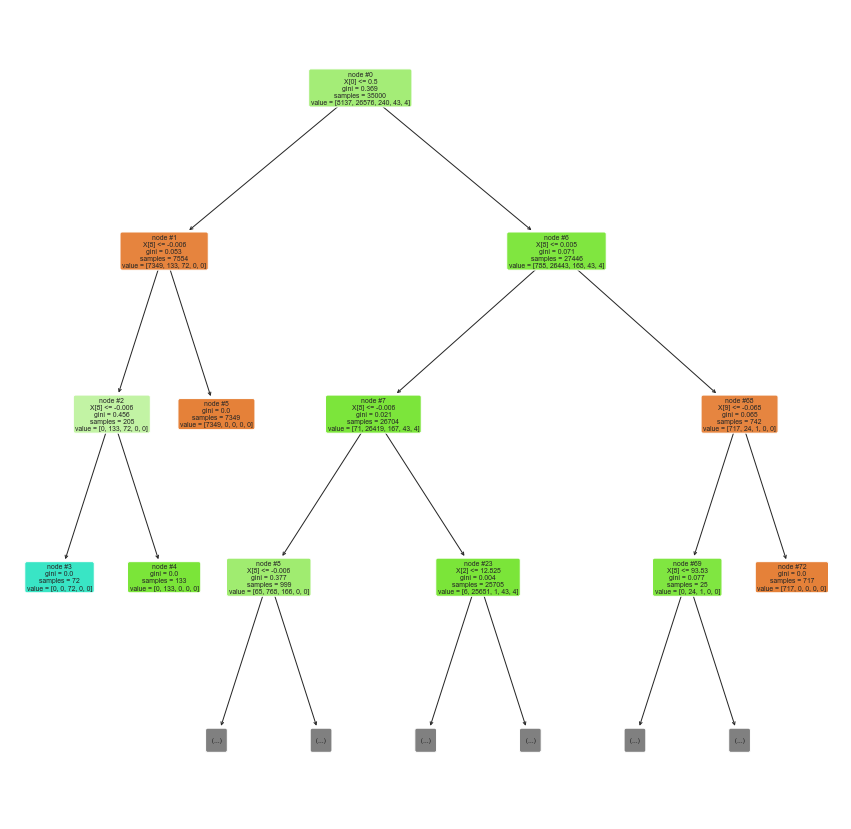

In [53]:
_=plt.figure(figsize=(15,15))
_=plot_tree(
            D,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
   
    
            )
_=plt.show()

KNN Classification

In [54]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [55]:
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 3485,     2,     1,     0,     0],
       [    0, 11384,     6,     0,     0],
       [    0,    24,    79,     0,     0],
       [    0,     1,     1,    16,     0],
       [    0,     1,     0,     0,     0]], dtype=int64)

0.9976

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=16)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=20)

KNeighborsClassifier(n_neighbors=21)

KNeighborsClassifier(n_neighbors=22)

KNeighborsClassifier(n_neighbors=23)

KNeighborsClassifier(n_neighbors=24)

KNeighborsClassifier(n_neighbors=25)

KNeighborsClassifier(n_neighbors=26)

KNeighborsClassifier(n_neighbors=27)

KNeighborsClassifier(n_neighbors=28)

KNeighborsClassifier(n_neighbors=29)

KNeighborsClassifier(n_neighbors=30)

KNeighborsClassifier(n_neighbors=31)

KNeighborsClassifier(n_neighbors=32)

KNeighborsClassifier(n_neighbors=33)

KNeighborsClassifier(n_neighbors=34)

KNeighborsClassifier(n_neighbors=35)

KNeighborsClassifier(n_neighbors=36)

KNeighborsClassifier(n_neighbors=37)

KNeighborsClassifier(n_neighbors=38)

KNeighborsClassifier(n_neighbors=39)

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Error Rate vs. K Value')

Text(0.5, 0, 'K')

Text(0, 0.5, 'Error Rate')

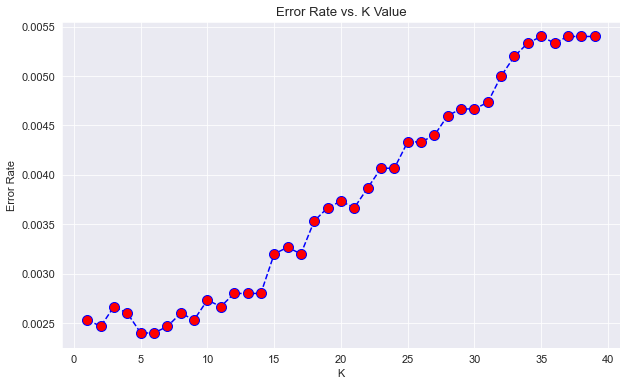

Minimum error:- 0.0023999999999999577 at K = 5


In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(1-accuracy_score(y_test, pred_i))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [57]:
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

0.9974

Random Forest Classification

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)

RandomForestClassifier()

In [59]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  276,    38,  3174,     0,     0],
       [    0, 11058,   332,     0,     0],
       [    0,    64,    39,     0,     0],
       [    0,    18,     0,     0,     0],
       [    0,     1,     0,     0,     0]], dtype=int64)

In [60]:
print(classification_report(y_test, y_pred))

C:\ProgramData\Anaconda31\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         dos       1.00      0.08      0.15      3488
      normal       0.99      0.97      0.98     11390
       probe       0.01      0.38      0.02       103
         r2l       0.00      0.00      0.00        18
         u2r       0.00      0.00      0.00         1

    accuracy                           0.76     15000
   macro avg       0.40      0.29      0.23     15000
weighted avg       0.98      0.76      0.78     15000



C:\ProgramData\Anaconda31\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda31\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

8    3.937353e-01
0    3.730533e-01
9    2.177560e-01
7    8.312437e-03
2    4.320283e-03
5    1.872000e-03
1    5.532597e-04
4    2.481609e-04
3    1.488745e-04
6    3.463653e-07
dtype: float64

In [62]:
list(zip(df.columns, feature_imp))

[('Duration', 0.39373530244695687),
 ('Protocoltype', 0.3730533405652233),
 ('Srcbytes', 0.2177559949884082),
 ('Dstbytes', 0.008312436991124241),
 ('Numfailedlogins', 0.004320283239578811),
 ('Suattempted', 0.0018720002034949008),
 ('Numroot', 0.0005532597398581455),
 ('Numfilecreations', 0.00024816091782001377),
 ('Numshells', 0.0001488745421898682),
 ('Numaccessfiles', 3.4636534568630024e-07)]

<AxesSubplot:>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


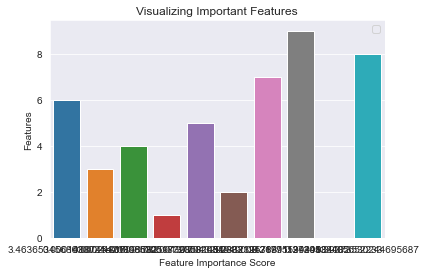

In [63]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [64]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7582


In [65]:
print(classification_report(y_test, y_pred))

C:\ProgramData\Anaconda31\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         dos       1.00      0.08      0.15      3488
      normal       0.99      0.97      0.98     11390
       probe       0.01      0.38      0.02       103
         r2l       0.00      0.00      0.00        18
         u2r       0.00      0.00      0.00         1

    accuracy                           0.76     15000
   macro avg       0.40      0.29      0.23     15000
weighted avg       0.98      0.76      0.78     15000



C:\ProgramData\Anaconda31\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda31\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Neural Network Classification

In [66]:
print (X_train.shape)
print (X_test.shape)

(35000, 13)
(15000, 13)


In [67]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [68]:
#pip install tensorflow

In [69]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

#Creating Neural Network
model=Sequential()
model.add(Dense(12,input_dim=X.shape[1],activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='softmax'))

ModuleNotFoundError: No module named 'tensorflow'